In [70]:
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sb

plt.rcParams['figure.figsize'] = (12, 8)
plt.style.use('seaborn-whitegrid')

# ETL

## Crop Data

In [71]:
df=pd.read_csv('/Users/ruhidmirzayev/Jupyther Notebooks/Palette/Data/RuralMunicipality/rm_crop_yields_1938_2021.csv')

In [72]:
df.head(2)

,Year,RM,Winter Wheat,Canola,Spring Wheat,Mustard,Durum,Sunflowers,Oats,Lentils,Peas,Barley,Fall Rye,Canary Seed,Spring Rye,Tame Hay,Flax,Chickpeas
0,1938,1,NaN,NaN,4.0,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,0.0,NaN
1,1939,1,NaN,NaN,9.0,NaN,NaN,NaN,16.0,NaN,NaN,16.0,NaN,NaN,NaN,NaN,0.0,NaN


In [73]:
df.columns

Index(['Year', 'RM', 'Winter Wheat', 'Canola', 'Spring Wheat', 'Mustard',
       'Durum', 'Sunflowers', 'Oats', 'Lentils', 'Peas', 'Barley', 'Fall Rye',
       'Canary Seed', 'Spring Rye', 'Tame Hay', 'Flax', 'Chickpeas'],
      dtype='object')

In [74]:
df=df.rename(columns={

    'Winter Wheat': 'WinterWheat',
    'Spring Wheat':'SpringWheat',
    'Fall Rye': 'FallRye',
    'Canary Seed':'CanarySeed',
    'Spring Rye': 'SpringRye',
    'Tame Hay': 'TameHay'
})

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25017 entries, 0 to 25016
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Year         25017 non-null  int64  
 1   RM           25017 non-null  int64  
 2   WinterWheat  3037 non-null   float64
 3   Canola       14008 non-null  float64
 4   SpringWheat  24924 non-null  float64
 5   Mustard      4487 non-null   float64
 6   Durum        11581 non-null  float64
 7   Sunflowers   946 non-null    float64
 8   Oats         23913 non-null  float64
 9   Lentils      5515 non-null   float64
 10  Peas         8134 non-null   float64
 11  Barley       24703 non-null  float64
 12  FallRye      15847 non-null  float64
 13  CanarySeed   3819 non-null   float64
 14  SpringRye    805 non-null    float64
 15  TameHay      4205 non-null   float64
 16  Flax         20934 non-null  float64
 17  Chickpeas    960 non-null    float64
dtypes: float64(16), int64(2)
memory usage: 3.4 MB


In [76]:
# We need to change RM int64 to string as it is ID variable
df.RM.unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  17,
        18,  19,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,  42,
        43,  44,  45,  46,  49,  51,  61,  63,  64,  65,  66,  67,  68,
        69,  70,  71,  72,  73,  74,  75,  76,  77,  78,  79,  91,  92,
        93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104, 105,
       106, 107, 108, 109, 110, 111, 121, 122, 123, 124, 125, 126, 127,
       128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 141,
       142, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162,
       163, 164, 165, 166, 167, 168, 169, 171, 181, 183, 184, 185, 186,
       187, 189, 190, 191, 193, 194, 211, 213, 214, 215, 216, 217, 218,
       219, 220, 221, 222, 223, 224, 225, 226, 228, 229, 230, 231, 232,
       241, 243, 244, 245, 246, 247, 248, 250, 251, 252, 253, 254, 255,
       256, 257, 259, 260, 261, 271, 273, 274, 275, 276, 277, 278, 279,
       280, 281, 282, 283, 284, 285, 286, 287, 288, 290, 292, 30

In [77]:
df['RM']=df['RM'].astype('string')


In [78]:
df['RM'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 25017 entries, 0 to 25016
Series name: RM
Non-Null Count  Dtype 
--------------  ----- 
25017 non-null  string
dtypes: string(1)
memory usage: 195.6 KB


## Missing Values

In [79]:
df.isna().sum()

Year               0
RM                 0
WinterWheat    21980
Canola         11009
SpringWheat       93
Mustard        20530
Durum          13436
Sunflowers     24071
Oats            1104
Lentils        19502
Peas           16883
Barley           314
FallRye         9170
CanarySeed     21198
SpringRye      24212
TameHay        20812
Flax            4083
Chickpeas      24057
dtype: int64

In [80]:
missing_values = dict(df.isna().sum())
column_names = list(missing_values.keys())
missing_counts = list(missing_values.values())

df_missing = pd.DataFrame({'Column': column_names, 'Missing Values': missing_counts}).set_index('Column')

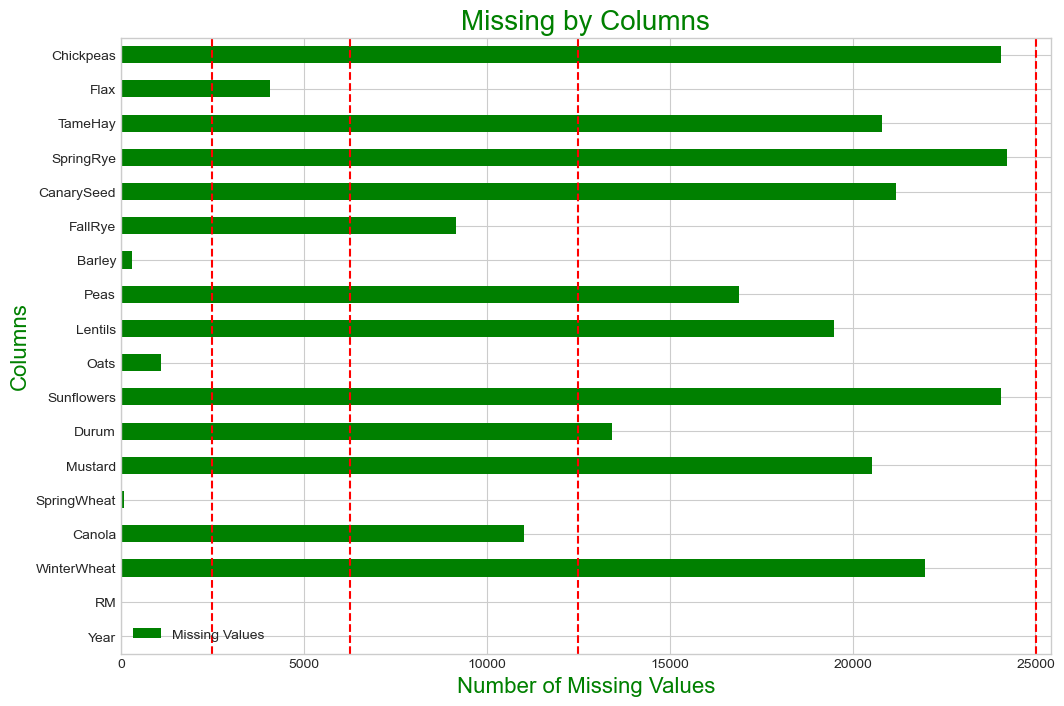

In [81]:
df_missing.plot(kind='barh', color='green')
plt.title('Missing by Columns',size=20, color='green')
plt.xlabel('Number of Missing Values', size=16, color='green')
plt.ylabel('Columns', size=16, color='green')
plt.axvline(len(df), linestyle='--', color='red')
plt.axvline(len(df)/2, linestyle='--', color='red')
plt.axvline(len(df)*0.25, linestyle='--', color='red')
plt.axvline(len(df)*0.10, linestyle='--', color='red')
plt.show()

In [82]:
df=df.drop(['Chickpeas','TameHay','SpringRye', 'CanarySeed', 'Peas', 'Lentils', 'Sunflowers', 'Durum', 'Mustard', 'WinterWheat'],axis=1)

In [83]:
df.columns

Index(['Year', 'RM', 'Canola', 'SpringWheat', 'Oats', 'Barley', 'FallRye',
       'Flax'],
      dtype='object')

In [84]:
cols_crop = ['Canola', 'SpringWheat', 'Oats', 'Barley', 'FallRye',
       'Flax']

## GIS Data

In [85]:
gdf=gpd.read_file('/Users/ruhidmirzayev/Jupyther Notebooks/Palette/Data/RuralMunicipality/RuralMunicipality.shp')

In [86]:
gdf.head(2)

,PPID,EFFDT,EXPDT,FEATURECD,RMNO,RMNM,SHAPE_AREA,SHAPE_LEN,geometry
0,0101000095,2019-01-21,None,RMPPID,095,GOLDEN WEST,8.101431e+08,265851.388799,"POLYGON ((654081.000 5546088.320, 654885.320 5..."
1,0101000378,2019-07-29,None,RMPPID,378,ROSEMOUNT,5.844701e+08,161271.937167,"POLYGON ((265258.740 5810148.180, 266062.740 5..."


In [87]:
gdf = gdf[['RMNO', 'geometry']]

In [88]:
gdf=gdf.rename(columns={'RMNO':'RM'})

In [89]:
gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 298 entries, 0 to 297
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   RM        298 non-null    object  
 1   geometry  298 non-null    geometry
dtypes: geometry(1), object(1)
memory usage: 4.8+ KB


In [90]:
gdf.RM.unique()

array(['095', '378', '288', '106', '132', '335', '108', '367', '228',
       '107', '043', '009', '010', '075', '105', '074', '467', '303',
       '426', '318', '077', '310', '171', '245', '046', '012', '070',
       '333', '337', '194', '044', '007', '135', '280', '001', '292',
       '225', '458', '103', '226', '092', '216', '133', '231', '141',
       '008', '250', '104', '252', '110', '125', '162', '193', '305',
       '076', '169', '336', '366', '470', '101', '078', '304', '142',
       '349', '011', '224', '128', '131', '134', '109', '098', '274',
       '003', '004', '031', '040', '037', '111', '405', '160', '038',
       '379', '371', '094', '185', '126', '164', '123', '124', '079',
       '317', '222', '122', '165', '100', '067', '068', '320', '287',
       '395', '406', '401', '032', '259', '308', '370', '340', '398',
       '129', '099', '331', '247', '215', '091', '402', '438', '219',
       '213', '431', '102', '472', '017', '018', '469', '261', '232',
       '130', '251',

In [91]:
gdf['RM']=gdf['RM'].astype(int).astype('string')

In [92]:
gdf['RM'].unique()[:10] # 095 changed to 95

<StringArray>
['95', '378', '288', '106', '132', '335', '108', '367', '228', '107']
Length: 10, dtype: string

In [93]:
gdf.isna().sum()

RM          0
geometry    0
dtype: int64

## Creating New Datasets

# EDA

In [94]:
df[cols_crop].describe().T

,count,mean,std,min,25%,50%,75%,max
Canola,14008.0,24.146796,9.209177,0.0,18.0,23.0,29.20,59.50
SpringWheat,24924.0,25.778733,11.153028,0.0,19.0,25.6,31.80,198.00
Oats,23913.0,47.104433,21.775369,0.0,33.0,46.0,59.00,165.10
Barley,24703.0,38.022104,16.610425,0.0,26.0,37.9,48.75,105.94
FallRye,15847.0,21.225298,10.101176,0.0,15.0,20.0,26.30,108.00
Flax,20934.0,14.287663,7.082308,0.0,9.0,14.0,19.20,110.00


<AxesSubplot:>

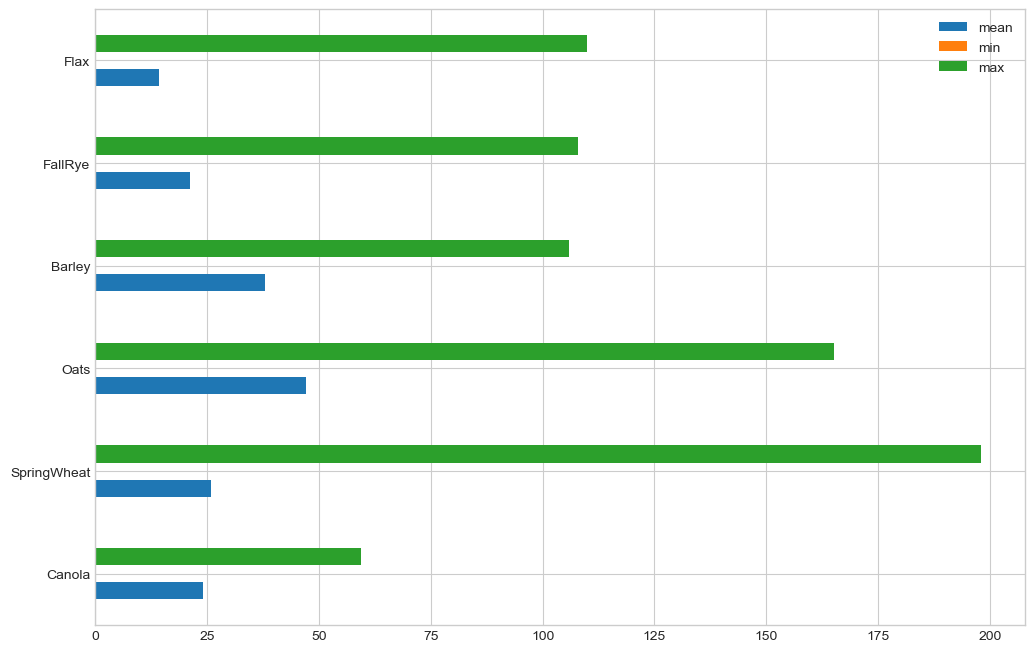

In [95]:
df[cols_crop].describe().T[['mean', 'min', 'max']].plot(kind='barh')

<AxesSubplot:>

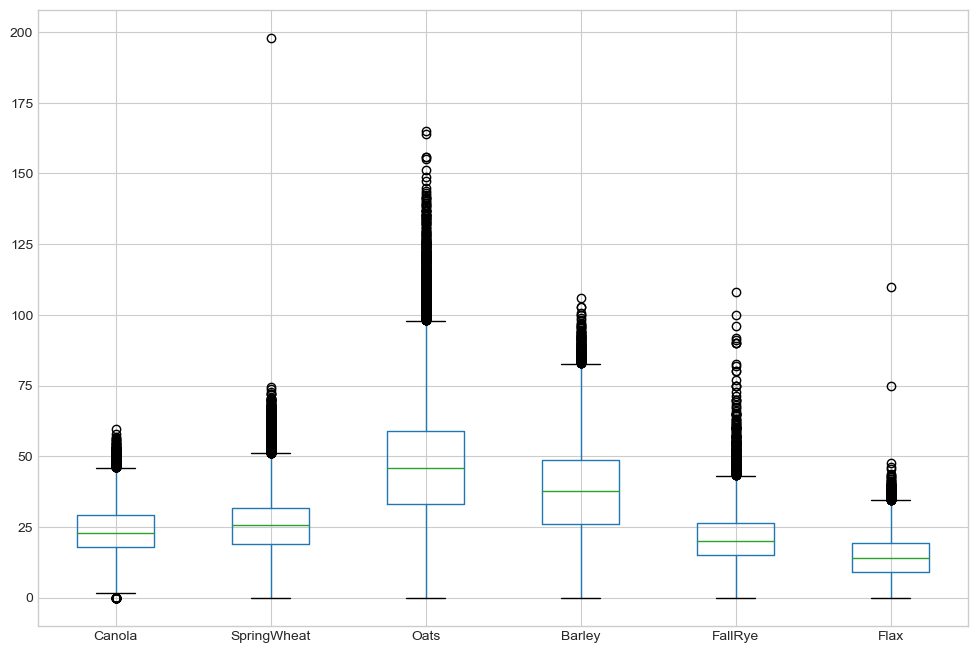

In [96]:
df[cols_crop].boxplot()

In [100]:
df.groupby('RM')\
    .mean()\
    .reset_index()\
    .isna()\
    .sum()

RM             0
Year           0
Canola         0
SpringWheat    0
Oats           0
Barley         0
FallRye        0
Flax           0
dtype: int64

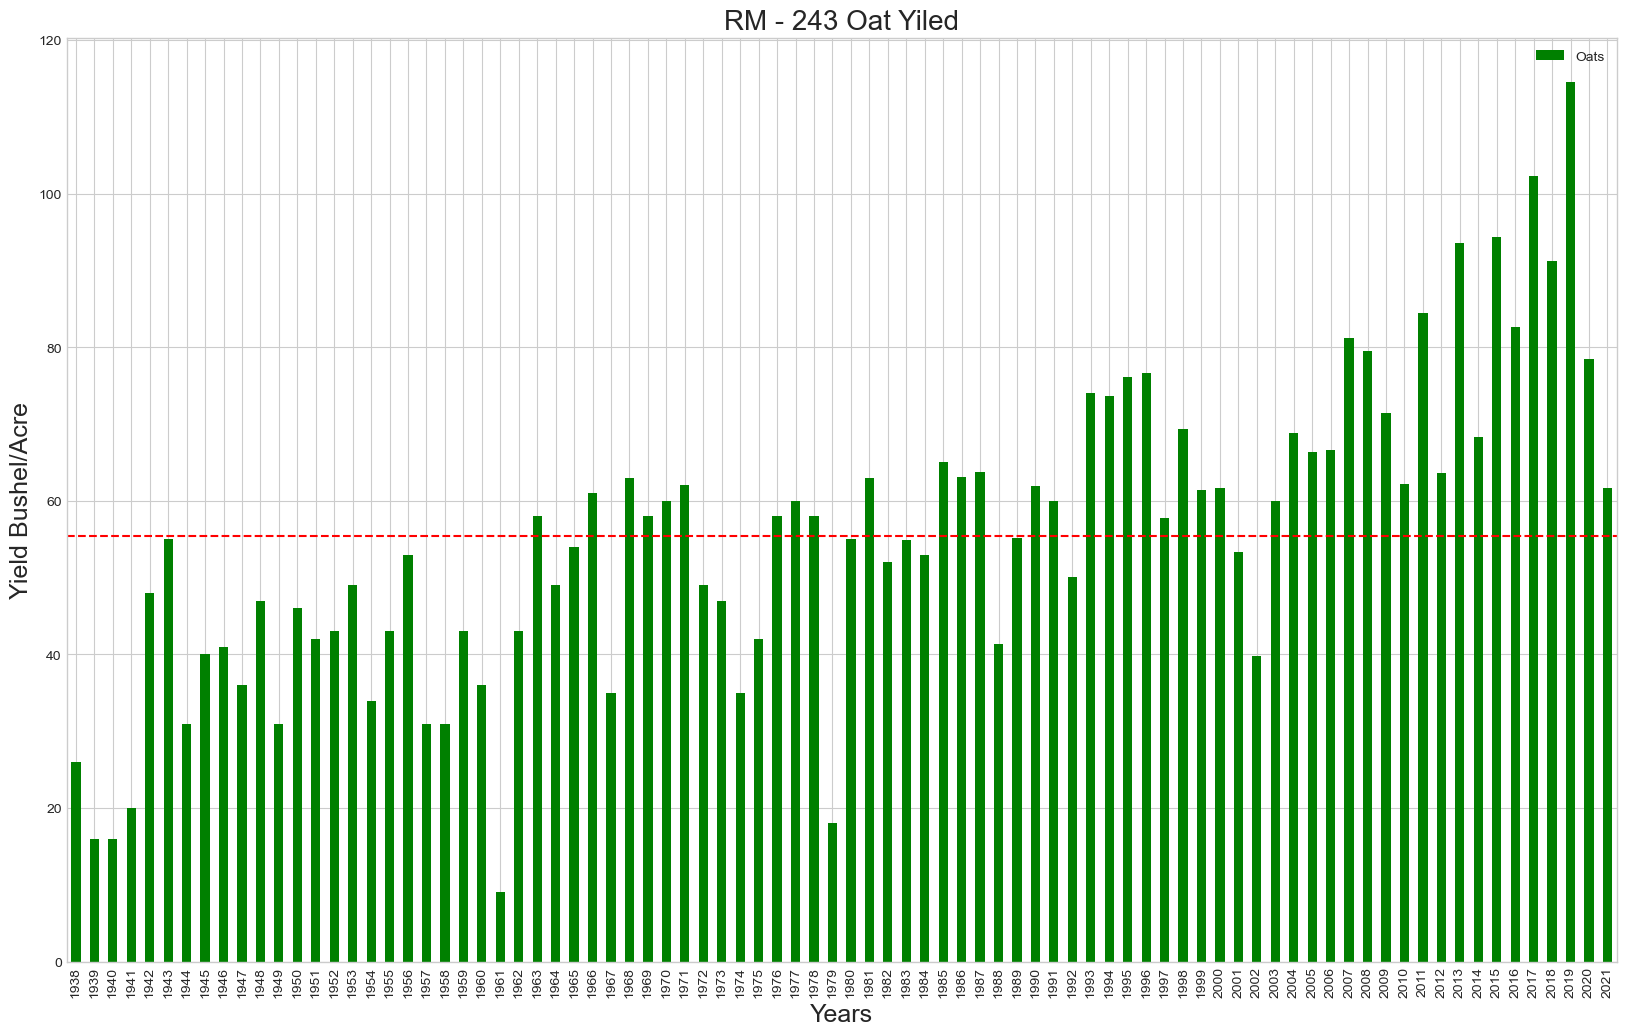

In [113]:
df.loc[df['RM']=='243'][['Year','Oats']].set_index('Year').plot(kind='bar',
                                                                figsize=(20,12),
                                                                color='green')
plt.title('RM - 243 Oat Yiled', size=20)
plt.xlabel('Years', size=18)
plt.ylabel('Yield Bushel/Acre', size=18)
plt.axhline(np.mean(df.loc[df['RM']=='243'][['Year','Oats']]['Oats']),linestyle='--',color='red')
plt.show()

<AxesSubplot:>

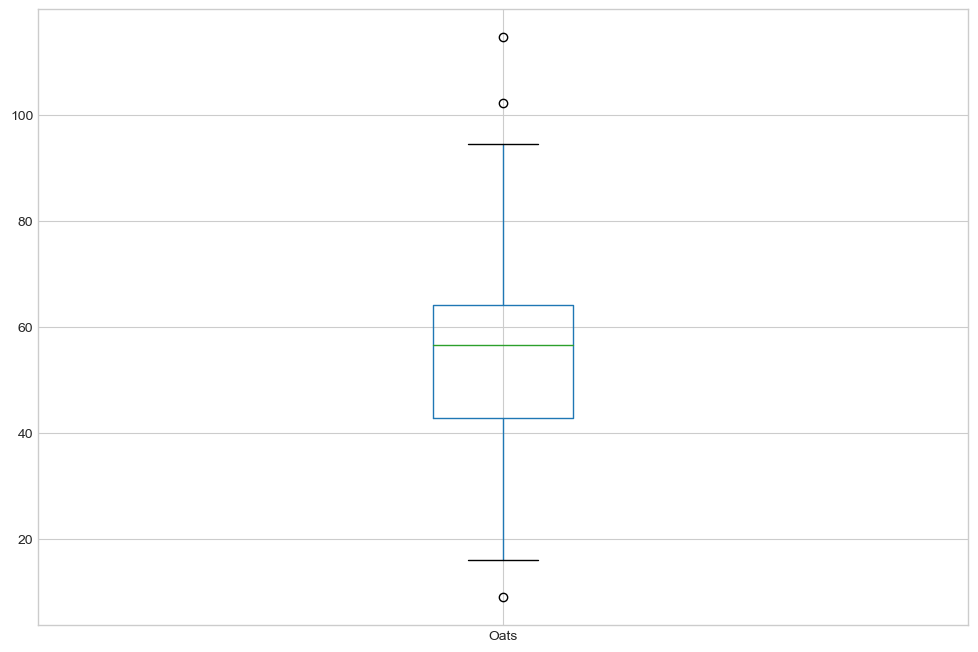

In [189]:
df.loc[df['RM']=='243'][['Year','Oats']].set_index('Year').boxplot()

array([[<AxesSubplot:title={'center':'Oats'}>]], dtype=object)

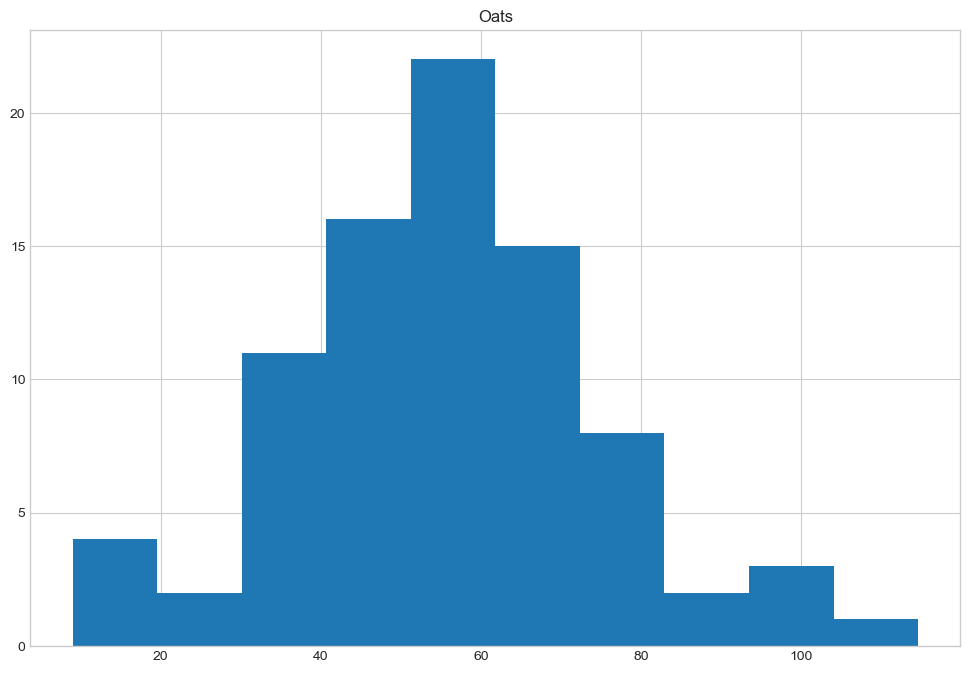

In [114]:
df.loc[df['RM']=='243'][['Year','Oats']].set_index('Year').hist()

In [121]:
df.drop('Year',axis=1).groupby('RM').agg(['mean', 'std']).reset_index()

RM     Canola            SpringWheat                  Oats             \
               mean        std        mean        std       mean        std   
0      1  21.947115   7.485171   24.154096  10.653101  45.644881  21.913575   
1     10  20.182593   7.791773   18.130617   7.547006  33.550000  14.436372   
2    100  24.481579   9.141354   22.711205   8.524202  41.467308  17.957699   
3    101  22.195000   8.611984   20.899167   7.631684  36.346000  13.631099   
4    102  25.453824  10.921088   23.108690   9.779509  38.546184  14.697691   
..   ...        ...        ...         ...        ...        ...        ...   
294   95  22.844259   8.911085   26.113095  11.178258  45.917024  18.721586   
295   96  23.301800   9.493180   24.608571  10.932052  42.541205  18.067159   
296   97  21.731190  10.768213   23.008810   9.167113  40.622024  19.591894   
297   98  24.282432  11.277527   26.781905  10.760167  49.062625  23.954375   
298   99  23.984571  11.919721   22.123133   7.575546  40.696500  17.480106   

        Barley               FallRye                  Flax            
          mean        std       mean        std       mean       std  
0    37.405301  18.773591  27.195789  12.460320  12.383625  7.051466  
1    28.328701  11.960153  15.510870   7.746317   9.431429  6.071642  
2    34.883012  13.013720  19.091176   9.572130  14.383766  6.874853  
3    30.871905  10.853777  19.834286   9.690594  11.715833  5.292942  
4    36.082892  15.805933  18.050769   9.047170  13.279750  7.302157  
..         ...        ...        ...        ...        ...       ...  
294  38.334524  16.959195  22.945806  10.032930  14.601071  7.252219  
295  34.034699  15.142339  23.272973  12.252390  13.985357  6.826170  
296  32.208810  14.845111  17.918519   7.760691  12.956747  6.560079  
297  38.135000  15.575749  19.350000   5.501435  14.551667  7.064908  
298  32.584167  13.829367  20.400000   9.673848  13.711325  6.552959  

[299 rows x 13 columns]

In [131]:
df_mean_std=df.drop('Year',axis=1).groupby('RM').agg(['mean', 'std'])

In [133]:
['{}_{}'.format(col[0], col[1]) for col in df_mean_std.columns]

['Canola_mean',
 'Canola_std',
 'SpringWheat_mean',
 'SpringWheat_std',
 'Oats_mean',
 'Oats_std',
 'Barley_mean',
 'Barley_std',
 'FallRye_mean',
 'FallRye_std',
 'Flax_mean',
 'Flax_std']

In [134]:
df_mean_std.columns=['{}_{}'.format(col[0], col[1]) for col in df_mean_std.columns]

In [136]:
df_mean_std=df_mean_std.reset_index()

In [137]:
df_mean_std

,RM,Canola_mean,Canola_std,SpringWheat_mean,SpringWheat_std,Oats_mean,Oats_std,Barley_mean,Barley_std,FallRye_mean,FallRye_std,Flax_mean,Flax_std
0,1,21.947115,7.485171,24.154096,10.653101,45.644881,21.913575,37.405301,18.773591,27.195789,12.460320,12.383625,7.051466
1,10,20.182593,7.791773,18.130617,7.547006,33.550000,14.436372,28.328701,11.960153,15.510870,7.746317,9.431429,6.071642
2,100,24.481579,9.141354,22.711205,8.524202,41.467308,17.957699,34.883012,13.013720,19.091176,9.572130,14.383766,6.874853
3,101,22.195000,8.611984,20.899167,7.631684,36.346000,13.631099,30.871905,10.853777,19.834286,9.690594,11.715833,5.292942
4,102,25.453824,10.921088,23.108690,9.779509,38.546184,14.697691,36.082892,15.805933,18.050769,9.047170,13.279750,7.302157
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,95,22.844259,8.911085,26.113095,11.178258,45.917024,18.721586,38.334524,16.959195,22.945806,10.032930,14.601071,7.252219
295,96,23.301800,9.493180,24.608571,10.932052,42.541205,18.067159,34.034699,15.142339,23.272973,12.252390,13.985357,6.826170
296,97,21.731190,10.768213,23.008810,9.167113,40.622024,19.591894,32.208810,14.845111,17.918519,7.760691,12.956747,6.560079
297,98,24.282432,11.277527,26.781905,10.760167,49.062625,23.954375,38.135000,15.575749,19.350000,5.501435,14.551667,7.064908


# Data Modelling

## Times Series

In [141]:
df_oat_243=df.loc[df['RM']=='243'][['Year','Oats']].set_index('Year')

In [143]:
df_oat_243.shape

(84, 1)

In [144]:
df_oat_243.head()

,Oats
Year,
1938,26.0
1939,16.0
1940,16.0
1941,20.0
1942,48.0


<AxesSubplot:xlabel='Year'>

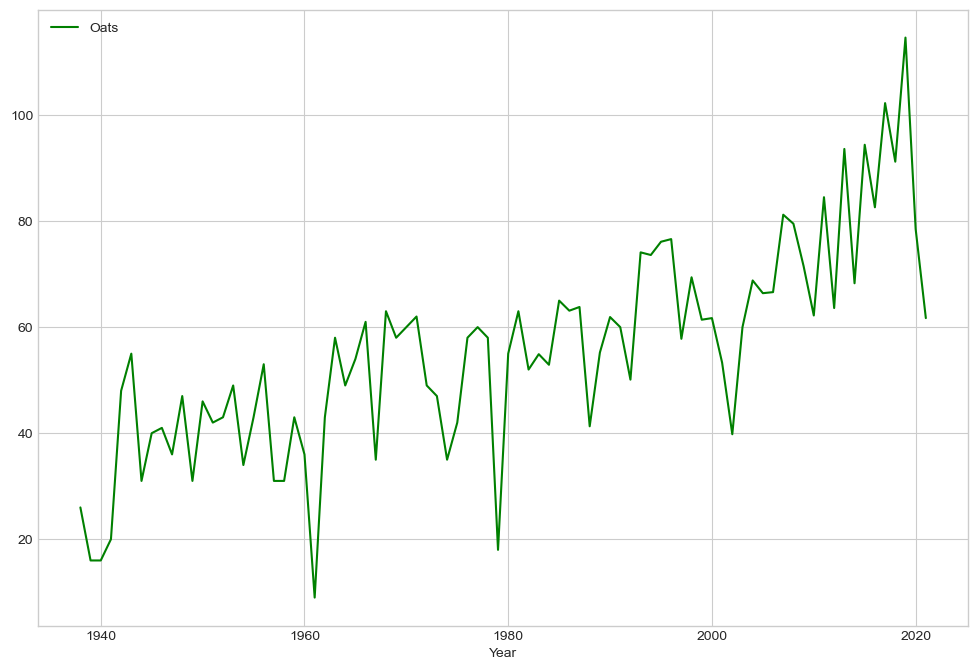

In [147]:
df_oat_243.plot(color='green')

### Splitting Dataset

In [166]:
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error


# Split the data into a training set and a testing set
train_size = int(0.8 * len(df_oat_243))
train, test = df_oat_243[:train_size], df_oat_243[train_size:]


### Autoregressive (AR)

Mean Absolute Error:29.98
Mean Squared Error: 1118.44
Root Mean Squared Error: 33.44


/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


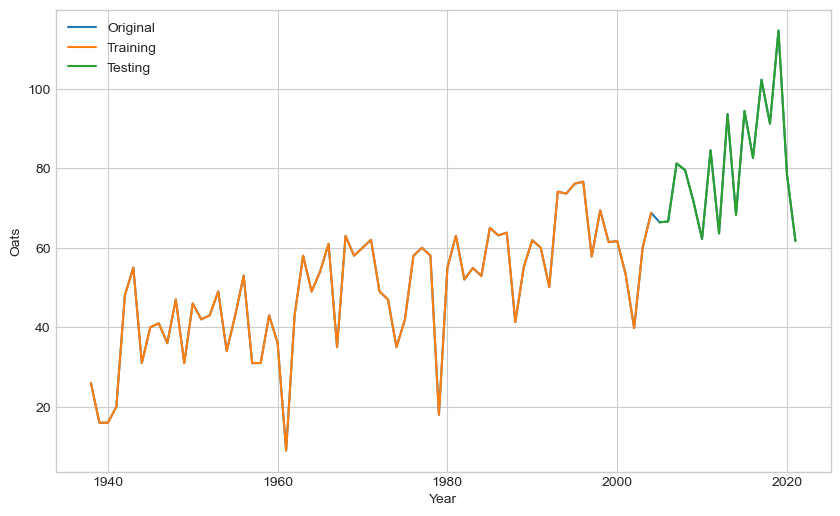

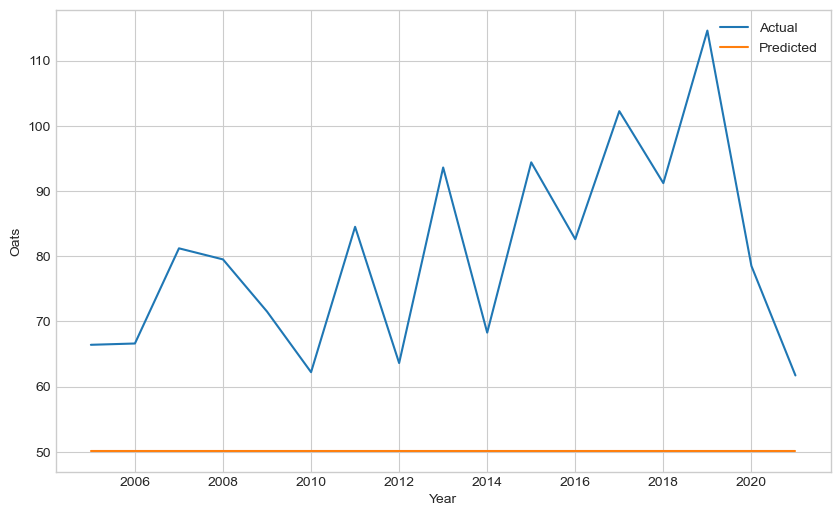

In [167]:
# Fit an AR model to the training set with an order of 1
ar_model = sm.tsa.AutoReg(train, lags=1).fit()

# Make predictions on the testing set
pred_ar = ar_model.predict(start=test.index[0], end=test.index[-1])

# Evaluate the model's performance on the testing set
mse_ar = mean_squared_error(test, pred_ar)
rmse_ar = np.sqrt(mse_ar)
mae_ar = mean_absolute_error(test['Oats'], pred_ar)

print(f'Mean Absolute Error:{mae_ar:.2f}')
print(f'Mean Squared Error: {mse_ar:.2f}')
print(f'Root Mean Squared Error: {rmse_ar:.2f}')

# Plot the original time series, the training set, and the testing set
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(df_oat_243, label='Original')
ax.plot(train, label='Training')
ax.plot(test, label='Testing')
ax.set_xlabel('Year')
ax.set_ylabel('Oats')
ax.legend()
plt.show()

# Plot the testing set predictions and the actual values
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(test, label='Actual')
ax.plot(pred_ar, label='Predicted')
ax.set_xlabel('Year')
ax.set_ylabel('Oats')
ax.legend()
plt.show()


In [168]:
# Finding optimal number of lags
# Define a range of lag values to test
lags = range(1, 11)

# Fit AR models with increasing numbers of lags and record the AIC values
aic_values = []
for lag in lags:
    model = sm.tsa.AutoReg(train['Oats'], lags=lag).fit()
    aic_values.append(model.aic)
    
# Find the lag value with the lowest AIC
optimal_lag = lags[np.argmin(aic_values)]

# Print the optimal lag value
print("Optimal Lag Value:", optimal_lag)

Optimal Lag Value: 10


/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self.

Mean Absolute Error:23.29
Mean Squared Error: 762.23
Root Mean Squared Error: 27.61


/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


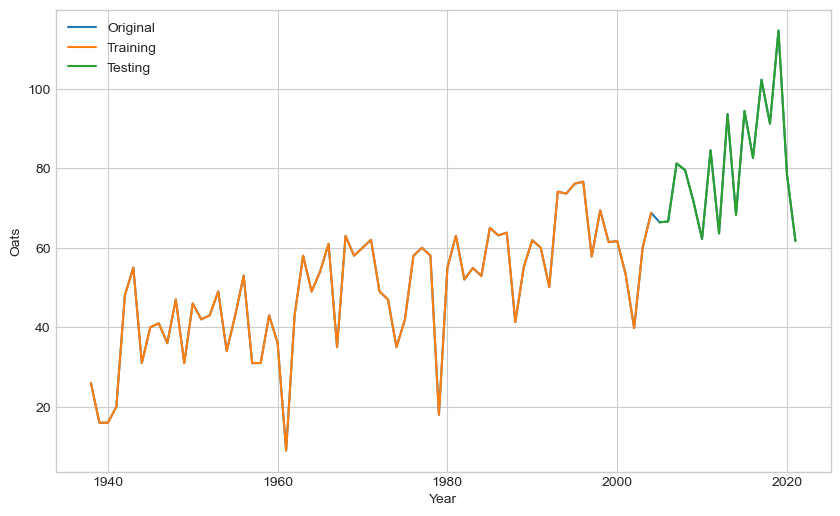

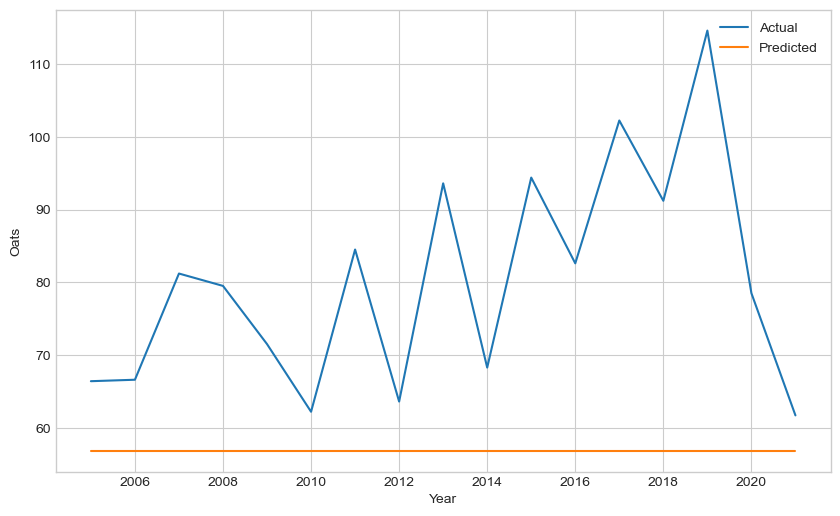

In [170]:
# Fit an AR model to the training set with an order of 1
ar_model = sm.tsa.AutoReg(train, lags=10).fit()

# Make predictions on the testing set
pred_ar = ar_model.predict(start=test.index[0], end=test.index[-1])

# Evaluate the model's performance on the testing set
mse_ar = mean_squared_error(test, pred_ar)
rmse_ar = np.sqrt(mse_ar)
mae_ar = mean_absolute_error(test['Oats'], pred_ar)

print(f'Mean Absolute Error:{mae_ar:.2f}')
print(f'Mean Squared Error: {mse_ar:.2f}')
print(f'Root Mean Squared Error: {rmse_ar:.2f}')

# Plot the original time series, the training set, and the testing set
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(df_oat_243, label='Original')
ax.plot(train, label='Training')
ax.plot(test, label='Testing')
ax.set_xlabel('Year')
ax.set_ylabel('Oats')
ax.legend()
plt.show()

# Plot the testing set predictions and the actual values
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(test, label='Actual')
ax.plot(pred_ar, label='Predicted')
ax.set_xlabel('Year')
ax.set_ylabel('Oats')
ax.legend()
plt.show()

### Autoregressive Moving Average Model

In [174]:
# Fit an ARMA model with (1, 1) order to the training data
arma_model = sm.tsa.AutoReg(train, lags=1).fit()

# Make predictions on the test data using the fitted model
pred_arma = arma_model.predict(start=len(train), end=len(df_oat_243)-1)

# Calculate mean absolute error of the predictions
mse_arma = mean_squared_error(test, pred_arma)
rmse_arma = np.sqrt(mse_arma)
mae_arma = mean_absolute_error(test, pred_arma)

print(f'Mean Absolute Error:{mae_arma:.2f}')
print(f'Mean Squared Error: {mse_arma:.2f}')
print(f'Root Mean Squared Error: {rmse_arma:.2f}')


Mean Absolute Error:28.71
Mean Squared Error: 1076.80
Root Mean Squared Error: 32.81


/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [177]:
# Define the range of p and q values to try
p_values = range(0, 10)
q_values = range(0, 10)

# Initialize variables to store the best model and its AIC value
best_aic = float('inf')
best_model = None

# Loop over all combinations of p and q values
for p in p_values:
    for q in q_values:
        try:
            # Fit an ARMA model for the current (p, q) values
            model = sm.tsa.AutoReg(train, order=(p, q)).fit()
            
            # Calculate the AIC value for the current model
            aic = model.aic
            
            # If the current model has a lower AIC value than the previous best model, update the best model
            if aic < best_aic:
                best_aic = aic
                best_model = model
                
        except:
            # If the model fitting fails for some (p, q) values, continue to the next one
            continue

# Print the optimal (p, q) values and the AIC value of the best model if a best model is found
if best_model is not None:
    print(f'Optimal (p, q) values: {best_model.order}')
    print(f'AIC of the best model: {best_aic:.2f}')
else:
    print("No model can be fit for the given (p, q) values")

No model can be fit for the given (p, q) values


In [178]:
# Fit an ARMA model with (1, 1) order to the training data
arma_model = sm.tsa.AutoReg(train, lags=10).fit()

# Make predictions on the test data using the fitted model
pred_arma = arma_model.predict(start=len(train), end=len(df_oat_243)-1)

# Calculate mean absolute error of the predictions
mse_arma = mean_squared_error(test, pred_arma)
rmse_arma = np.sqrt(mse_arma)
mae_arma = mean_absolute_error(test, pred_arma)

print(f'Mean Absolute Error:{mae_arma:.2f}')
print(f'Mean Squared Error: {mse_arma:.2f}')
print(f'Root Mean Squared Error: {rmse_arma:.2f}')

Mean Absolute Error:21.61
Mean Squared Error: 692.95
Root Mean Squared Error: 26.32


/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


### ARIMA

In [186]:
# Define the ARIMA model
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(train, order=(1,1,1)) # p=1, d=1, q=1

# Fit the model to the training data
model_fit = model.fit()

# Make predictions on the test data
pred_arima = model_fit.forecast(steps=len(test))

# Calculate the mean squared error of the model on the test set
# Calculate mean absolute error of the predictions

mse_arima = mean_squared_error(test, pred_arima)
rmse_arima = np.sqrt(mse_arima)
mae_arima = mean_absolute_error(test, pred_arima)

print(f'Mean Absolute Error:{mae_arima:.2f}')
print(f'Mean Squared Error: {mse_arima:.2f}')
print(f'Root Mean Squared Error: {rmse_arima:.2f}')


Mean Absolute Error:19.12
Mean Squared Error: 588.80
Root Mean Squared Error: 24.27


/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


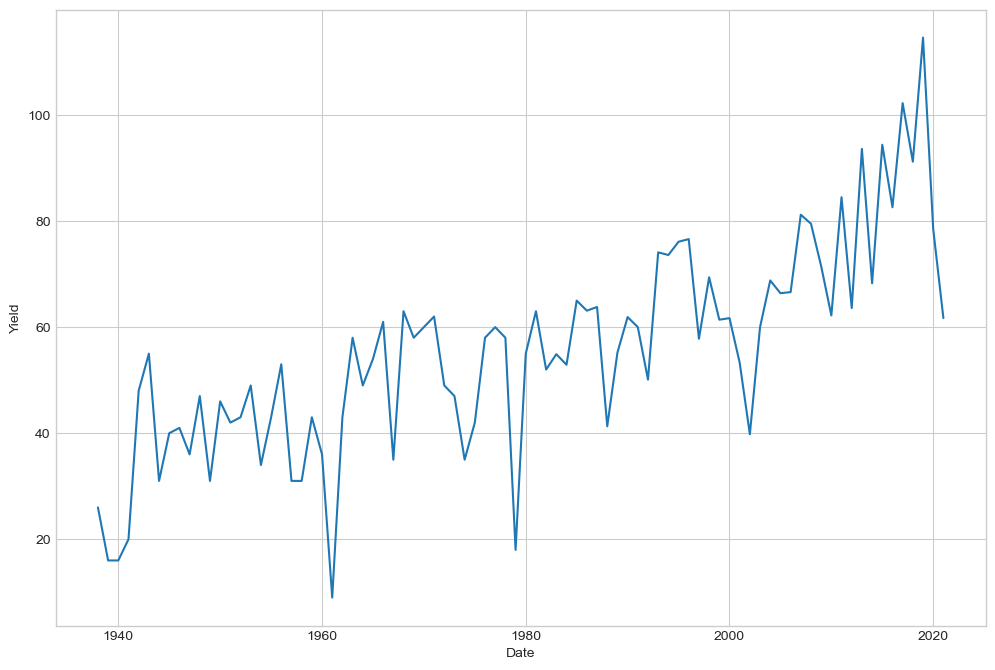

ADF Statistic: -2.102838
p-value: 0.243375
Critical Values:
	1%: -3.515
	5%: -2.898
	10%: -2.586
Fail to reject null hypothesis, data is non-stationary


/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self.

Best Order: (0, 1, 1)


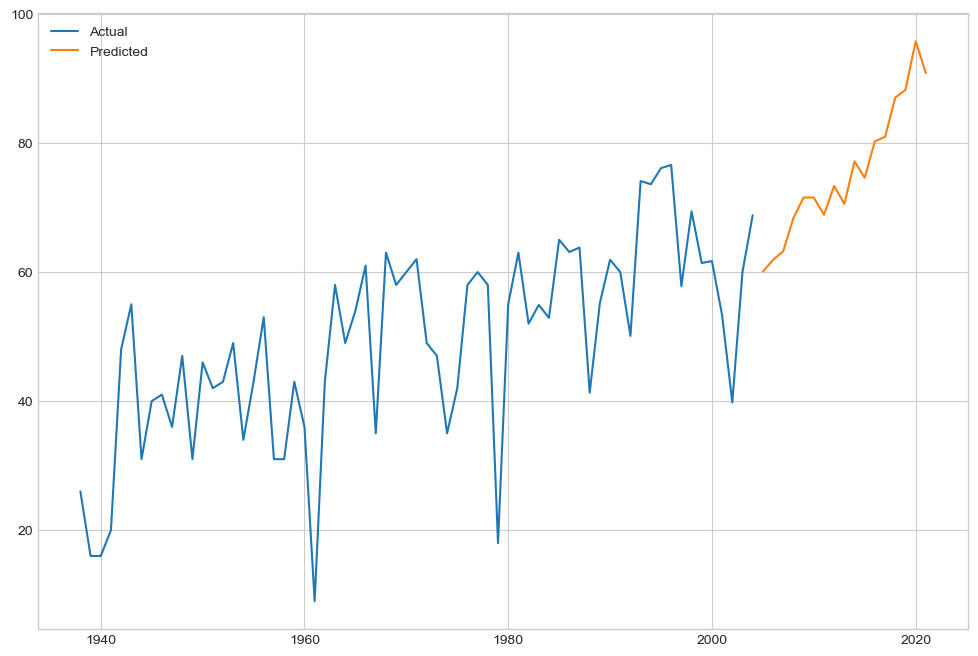

In [187]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


# Visualize the data
plt.plot(df_oat_243)
plt.xlabel('Date')
plt.ylabel('Yield')
plt.show()

# Check for stationarity
result = adfuller(df_oat_243)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))
if result[0] < result[4]["5%"]:
    print("Reject null hypothesis, data is stationary")
else:
    print("Fail to reject null hypothesis, data is non-stationary")

# Fit ARIMA model and select the best model using AIC
best_aic = np.inf
best_order = None
for p in range(5):
    for d in range(2):
        for q in range(5):
            try:
                model = ARIMA(df_oat_243, order=(p, d, q))
                results = model.fit()
                if results.aic < best_aic:
                    best_aic = results.aic
                    best_order = (p, d, q)
            except:
                continue
print('Best Order:', best_order)

# Validate the model
model = ARIMA(df_oat_243, order=best_order)
results = model.fit()
pred_arima = results.predict(start= len(train), end=(len(df_oat_243)-1))
plt.plot(train, label='Actual')
plt.plot(pred_arima, label='Predicted')
plt.legend()
plt.show()

In [188]:
mse_arima = mean_squared_error(test, pred_arima)
rmse_arima = np.sqrt(mse_arima)
mae_arima = mean_absolute_error(test, pred_arima)

print(f'Mean Absolute Error:{mae_arima:.2f}')
print(f'Mean Squared Error: {mse_arima:.2f}')
print(f'Root Mean Squared Error: {rmse_arima:.2f}')

Mean Absolute Error:13.36
Mean Squared Error: 250.35
Root Mean Squared Error: 15.82


In [ ]:
# Facebook Prophet
# XGBoost
# 1938 1939 1949    1940
# 1941 1942 1943    1942

In [194]:
13/55*100

23.636363636363637

# Clustering